### Review/Questions [5 - 10 minute]
0. See Nov15 TUT and Nov18 LEC, Review confusion matrix and relevant 
1. If you have any questions or if there's anything unclear about the concepts we've covered so far, please drop your questions here before we dive into the ethics module.

### Demo and open questions [50 minutes] Exploring Existing Biases and Unfairness in Clinical Trial Case Studies and the 'Adult Income' Dataset: 

1. Clinical Trial Confusion Matrix and Ethical Considerations
    1. Confusion Matrix Overview and Interpretation
    2. Class Imbalance and Ethical Considerations and Scenario

Lyme disease is a tick-borne illness that can cause severe health problems if not treated early. Early symptoms are often nonspecific and can mimic less severe viral illnesses, making accurate diagnosis necessarg. A healthcare tech company has developed a machine learning model intended to assist doctors in diagnosing Lyme disease based on symptoms, history of tick exposure, and initial blood tests. The model was tested in a clinical trial involving patients suspected of having Lyme disease based on their symptoms and exposure history. Here is the confusion matrix from the trial:


**A. Confusion Matrix Overview and Interpretation**

>|                 | Predict Disease | Predict No Disease |
>|-----------------|-----------------|--------------------|
>| **Disease**     | 23              | 7                  |
>| **No Disease**  | 90              | 280                |
>
>
>Interpretation and Metrics:
>- **True Positives (TP)**: 23 - The model correctly predicted the disease.
>- **False Negatives (FN)**: 7 - The model incorrectly predicted no disease when the disease was present.
>- **False Positives (FP)**: 90 - The model incorrectly predicted the disease when it was absent.
>- **True Negatives (TN)**: 280 - The model correctly predicted no disease.
>
>**Accuracy**: $\frac{TP + TN}{TP + FN + FP + TN} = \frac{23 + 280}{23 + 7 + 90 + 280} = 0.759$
>
>**Sensitivity** or **Recall**: $\frac{TP}{TP + FN} = \frac{23}{23 + 7} = 0.767$
>
>**Specificity**: $\frac{TN}{FP + TN} = \frac{280}{90 + 280} = 0.757$

<br>

**B. Class Imbalance and Ethical Considerations and Scenario:**
Critical Decision-Making Scenarios

>1. **Healthcare Provider Decision - Treatment Commencement**
>   - **Context**: A provider reviews the model output before deciding to treat a patient suspected of Lyme disease.
>   - **Question**: Should the healthcare provider initiate treatment based solely on the model’s diagnosis >considering the high rate of false positives, or should additional tests be sought first? What are the ethical >implications of either decision, especially given the risk of progression in untreated Lyme disease?
>
><br>
>
>2. **Patient Perspective - Trust in Medical Advice**
>   - **Context**: A patient diagnosed with Lyme disease learns about the model's high false positive rate.
>   - **Question**: How should the patient approach the decision to accept the treatment recommended based on the >model’s prediction? What steps could they take to manage their anxiety and mistrust towards the diagnosis?
>
><br>
>
>3. **Healthcare System Decision - Model Calibration**
>   - **Context**: Administrators assess the model's impact on healthcare practices.
>   - **Question**: Should the healthcare system recalibrate the model to adjust the sensitivity and specificity >based on the current performance metrics? Consider the implications of such a recalibration on patient care, >resource allocation, and ethical responsibilities of healthcare providers.


2. Observing Ethical Issues and Questionable Practices in Unfamiliar Statistical Models Using the `Adult Data` Dataset:

    1. **Unfairness and Bias:**
          - **Implications of Imbalanced Data and Historical Bias:** Examines how disproportionate representation within the dataset and historical inequities influence model predictions, potentially perpetuating past biases and affecting fairness in outcomes.

    2. **Credibility and Integrity:** 
          - **Data Collection Methods:** Discusses the adequacy and representativeness of the data collection techniques used, questioning how these methods may impact the model's trustworthiness.
          - **Model Explainability and Transparency:** Addresses the necessity for models to be both understandable and transparent in their decision-making processes, ensuring stakeholders can assess the rationale behind predictive outcomes.

    3. **Accountability of Modeling:** 
          - **Positive Effect or Instruments of Harm?:** Challenges the models' applications to evaluate whether they serve as beneficial tools for decision-making or if they inadvertently become instruments of harm due to inherent biases or flawed assumptions.

Data Collected from: https://archive.ics.uci.edu/dataset/2/adult

### Data Pre-Processing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, \
ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", 
    "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

data = pd.read_csv(url, names=column_names, skipinitialspace=True)

df = data.copy()

df = df.drop(columns=['workclass', 'marital-status', 'occupation', 
                          'capital-gain', 'capital-loss', 'hours-per-week', 
                          'native-country', 'education-num', 'fnlwgt'])

display(df.head(), df.shape)

,age,education,relationship,race,sex,income
0,39,Bachelors,Not-in-family,White,Male,<=50K
1,50,Bachelors,Husband,White,Male,<=50K
2,38,HS-grad,Not-in-family,White,Male,<=50K
3,53,11th,Husband,Black,Male,<=50K
4,28,Bachelors,Wife,Black,Female,<=50K


(32561, 6)

In [3]:
# Inbalance data distribution
education_counts = df['education'].value_counts()
sex = df['sex'].value_counts()
race = df['race'].value_counts()
relationship = df['relationship'].value_counts()
income = df['income'].value_counts()

display(education_counts, sex, race, relationship, income)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

sex
Male      21790
Female    10771
Name: count, dtype: int64

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

**Thinking Point #1** (see homework section) 

In [4]:
# Handling the income mapping
data['income'] = data['income'].str.strip().map({'<=50K': 0, '>50K': 1})

# Check if any NaN values were created
if data['income'].isna().any():
    print("Warning: NA values found in 'income' after mapping.") # Warming if NaN value is found

# Encode categorical variables
categorical_columns = ['education', 'relationship', 'race', 'sex']
for column in categorical_columns:
    data[column] = pd.Categorical(data[column]).codes

# Prepare the DataFrame
df = data[['age', 'education', 'relationship', 'race', 'sex', 'income']]

# Standardize the age column
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']].astype(float))

/tmp/ipykernel_132/3417715027.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = scaler.fit_transform(df[['age']].astype(float))


### Model Fitting (Demonstration only, Logistics Regression will not be testable)

In [7]:
# Splitting the dataset
X = df[['age', 'education', 'relationship', 'race', 'sex']]
y = df['income']
X = sm.add_constant(X)  # Adding a constant for statsmodels

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

### Result Intepretation

True Positive: 185,
True Negative: 5957,
False Positive: 257,
False Negative: 1742


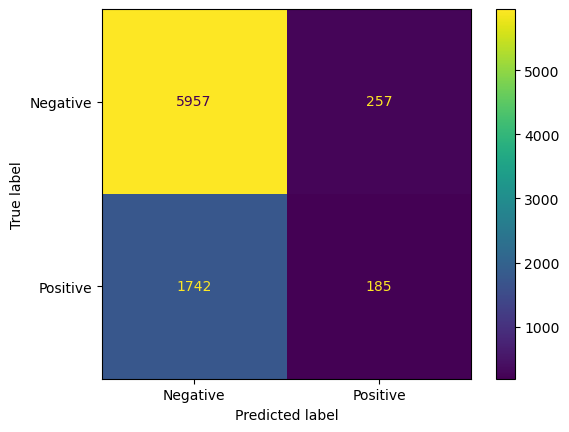

In [8]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Negative','Positive'])
disp.plot()

TN, FP, FN, TP = cm.ravel()
print(f'True Positive: {TP},\nTrue Negative: {TN},\nFalse Positive: {FP},\nFalse Negative: {FN}')

In [9]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)      
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")


# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:\n", vif_data)

Accuracy: 0.75
Precision: 0.42
Recall: 0.10
F1 Score: 0.16
VIF values:
         feature        VIF
0         const  34.469093
1           age   1.082441
2     education   1.002338
3  relationship   1.636709
4          race   1.014449
5           sex   1.527559


**Thinking Point #2**  (see homework section)

### Communication [1 hour]
In this activity, students will be organized into four groups to engage in a structured debate centered around two distinct ethical scenarios. Each scenario will be tackled by two groups—one defending a stance and the other opposing it. 


##### <u> Scenario 1: Predictive Policing: </u>
**Background**: A city's police department has implemented a new AI system designed to predict crime hotspots by analyzing historical crime data and demographic information. The system is intended to optimize police patrols and prevent crimes before they occur.

**Ethical Issues**:
- **Bias and Discrimination**: The AI system may inadvertently target minority communities if the historical crime data is biased.
- **Privacy**: The use of demographic data raises concerns about the surveillance and profiling of specific groups.
- **Transparency**: There is limited transparency on how the AI system makes decisions and whether it accurately predicts crime without infringing on citizens' rights.

**Debate Points**:
- **Group A** (Defending the Use): Argue that predictive policing is a valuable tool for enhancing public safety and efficiently allocating police resources.
- **Group B** (Arguing Against the Use): Contend that predictive policing perpetuates racial bias, violates privacy, and lacks the necessary transparency and oversight.

##### <u> Scenario 2: Healthcare AI for Predicting Patient Risks: </u>
**Background**: A healthcare startup has developed an AI system that uses patient data such as medical history, lifestyle choices, and genetic information to predict individuals’ risks of developing chronic diseases.

**Ethical Issues**:
- **Consent and Data Usage**: Concerns about how patient data is collected, used, and shared, particularly sensitive genetic information.
- **Accuracy and Reliability**: Potential inaccuracies in AI predictions could lead to misdiagnosis or unnecessary anxiety for patients.
- **Access and Equality**: The AI system could lead to unequal access to healthcare if predictions are used to prioritize care or determine insurance premiums.

**Debate Points**:
- **Group A** (Defending the Use): Defend the use of AI in healthcare as a means to advance preventive medicine and personalized care, potentially saving lives by early identification of risk factors.
- **Group B** (Arguing Against the Use): Argue that the use of AI in healthcare could compromise patient privacy, create disparities in healthcare access, and rely on potentially flawed algorithms that could misguide medical decisions.


### Homework [0 Minute]
>Code and write all your answers in a python notebook (in code and markdown cells) and save your python jupyter notebook in your own account and “repo” on github.com and submit a link to that notebook though Quercus for assignment marking.

1. Visit the  "[Pre-processing](https://chat.openai.com/share/d3b53784-6442-46da-b42d-5567a503991c)" and review the questionable practices in data preprocessing identified by ChatGPT: Pre-processing. Note any ethical concerns or questionable practices mentioned. 


2. Using the data distribution information provided before the thinking point #1, insert the following prompt into ChatGPT: 
    >Based on the following data distribution from a dataset, please analyze and describe any potential imbalances and biases present. Here are the distributions for various categories: 


3. Copy and paste the following detailed prompt(next cell) into ChatGPT, and once you receive the analysis, review it carefully.
> I have utilized a logistic regression model on a dataset from the 1994 Census database to predict income levels and obtained various statistical outputs. The steps included encoding categorical variables, standardizing age, and mapping income to binary categories. Here are the detailed results and components from the analysis:
>
> 1. Confusion Matrix Details:
>     * True Positives: 185
>     * True Negatives: 5957
>     * False Positives: 257
>     * False Negatives: 1742
>     * Accuracy: 75%
>     * Precision: 42%
>     * Recall: 10%
>     * F1 Score: 16%
>     
> 2. Variance Inflation Factor (VIF) for Multicollinearity Check:
>     * Constants (intercept): VIF = 34.47
>     * Age: VIF = 1.08
>     * Education: VIF = 1.00
>     * Relationship: VIF = 1.64
>     * Race: VIF = 1.01
>     * Sex: VIF = 1.53
>     
> Could you help interpret the specific components of these results:
>
> * Confusion Matrix: What does the proportion of false positives and false negatives suggest about the model’s specificity and sensitivity?
>
> * Accuracy and Precision Metrics: How do these values reflect the model’s overall effectiveness in predicting correct income categories?
>
> * Recall and F1 Score: Considering the low recall and F1 score, what might be the implications for the model's ability to identify the higher income class ('>50K’)?’
>
> * VIF Values: How do the specific VIF values for each feature influence our understanding of multicollinearity in this model?
>
> Additionally, can you provide a short summary of the model’s performance, focusing on both its shortcomings and advantages based on these results? Based on the detailed metrics provided, what targeted improvements could be suggested to enhance the model’s accuracy and predictive capabilities?
>
> Lastly, considering the results and the important steps taken during the data preparation and analysis, what possible ethical issues might be raised?"


4. Reflect on the findings from Tasks 1, 2, and 3. Write a 350-500 word analysis discussing how the dataset might be biased relative to the current economy and how the model or statistical operations could be prone to errors. Using insights from ChatGPT, propose how you could improve the dataset handling or model to mitigate these issues.